In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
df_uber = pd.read_csv("uberwithweather.csv")

df_uber.head()

,Unnamed: 0,ride_id,distance,cab_type,time_stamp,destination,pickup,price,name,date_col,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,0,7f47ff53-7cf2-4a6a-8049-83c90e042593,2.94,Uber,1.543520e+12,Fenway,North Station,NaN,Taxi,2018-11-29 20:00,...,NaN,NaN,NaN,NaN,NaN,89,804,Clouds,overcast clouds,04d
1,1,80a4247c-0c0f-4962-a8a6-33039e80baf9,2.84,Uber,1.543430e+12,Fenway,West End,23.0,Black,2018-11-28 17:00,...,NaN,NaN,NaN,NaN,NaN,99,804,Clouds,overcast clouds,04d
2,2,cbe688fa-4802-42a3-98bb-579e914d21fe,1.81,Uber,1.543430e+12,Theatre District,North End,10.5,UberX,2018-11-28 19:00,...,NaN,NaN,NaN,NaN,NaN,86,804,Clouds,overcast clouds,04d
3,3,c4c9c22e-03b8-4591-8840-0c7b0a213aac,1.97,Uber,1.544800e+12,Northeastern University,Beacon Hill,8.5,UberPool,2018-12-14 15:00,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
4,4,5c95d2a5-060e-48ac-978c-34599c5f720a,3.07,Uber,1.545080e+12,North Station,Fenway,NaN,Taxi,2018-12-17 22:00,...,NaN,NaN,NaN,NaN,NaN,79,803,Clouds,broken clouds,04n


In [109]:
df_lyft = pd.read_csv("lyftwithweather.csv")

df_lyft.head()

,Unnamed: 0,ride_id,distance,cab_type,time_stamp,destination,pickup,price,name,date_col,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,0,175688b5-eef3-411f-8240-9a1c350571fb,1.75,Lyft,1.543440e+12,Haymarket Square,Theatre District,22.5,lyft_lux,2018-11-28 22:00,...,NaN,NaN,NaN,NaN,NaN,100,500,Rain,light rain,10n
1,1,1aa04d78-8630-4f30-be6a-0bec07eeabd6,2.36,Lyft,1.543430e+12,Fenway,Beacon Hill,16.5,lyft_premier,2018-11-28 18:00,...,NaN,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04d
2,2,bac0c1d3-2bd0-4bd9-aabc-a18d1d5bf6bc,1.40,Lyft,1.543670e+12,Fenway,Back Bay,27.5,lyft_luxsuv,2018-12-01 13:00,...,NaN,NaN,NaN,NaN,NaN,48,802,Clouds,scattered clouds,03d
3,3,30ceda38-1290-4074-a7b8-6c876c6a8eed,2.44,Lyft,1.543810e+12,Beacon Hill,Northeastern University,3.5,lyft_line,2018-12-03 5:00,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
4,4,81ea313a-7bd7-4f41-a769-c6e9ef260d18,3.04,Lyft,1.544880e+12,West End,Boston University,32.5,lyft_luxsuv,2018-12-15 13:00,...,NaN,NaN,NaN,NaN,NaN,90,701,Mist,mist,50d


In [113]:
# df_lyft['Time']  = df_lyft['Time'].str.replace(":","")

# df_lyft['Time'] = df_lyft['Time'].astype(int)

df_lyft['Time'] = df_lyft.Time.round(decimals=-2)



df_lyft.head()

,Unnamed: 0,ride_id,distance,cab_type,time_stamp,destination,pickup,price,name,date_col,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,0,175688b5-eef3-411f-8240-9a1c350571fb,1.75,Lyft,1.543440e+12,Haymarket Square,Theatre District,22.5,lyft_lux,2018-11-28 22:00,...,NaN,NaN,NaN,NaN,NaN,100,500,Rain,light rain,10n
1,1,1aa04d78-8630-4f30-be6a-0bec07eeabd6,2.36,Lyft,1.543430e+12,Fenway,Beacon Hill,16.5,lyft_premier,2018-11-28 18:00,...,NaN,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04d
2,2,bac0c1d3-2bd0-4bd9-aabc-a18d1d5bf6bc,1.40,Lyft,1.543670e+12,Fenway,Back Bay,27.5,lyft_luxsuv,2018-12-01 13:00,...,NaN,NaN,NaN,NaN,NaN,48,802,Clouds,scattered clouds,03d
3,3,30ceda38-1290-4074-a7b8-6c876c6a8eed,2.44,Lyft,1.543810e+12,Beacon Hill,Northeastern University,3.5,lyft_line,2018-12-03 5:00,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
4,4,81ea313a-7bd7-4f41-a769-c6e9ef260d18,3.04,Lyft,1.544880e+12,West End,Boston University,32.5,lyft_luxsuv,2018-12-15 13:00,...,NaN,NaN,NaN,NaN,NaN,90,701,Mist,mist,50d


In [114]:
merge = pd.concat([df_uber, df_lyft],ignore_index=True)

merge.head()

,Unnamed: 0,ride_id,distance,cab_type,time_stamp,destination,pickup,price,name,date_col,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,0,7f47ff53-7cf2-4a6a-8049-83c90e042593,2.94,Uber,1.543520e+12,Fenway,North Station,NaN,Taxi,2018-11-29 20:00,...,NaN,NaN,NaN,NaN,NaN,89,804,Clouds,overcast clouds,04d
1,1,80a4247c-0c0f-4962-a8a6-33039e80baf9,2.84,Uber,1.543430e+12,Fenway,West End,23.0,Black,2018-11-28 17:00,...,NaN,NaN,NaN,NaN,NaN,99,804,Clouds,overcast clouds,04d
2,2,cbe688fa-4802-42a3-98bb-579e914d21fe,1.81,Uber,1.543430e+12,Theatre District,North End,10.5,UberX,2018-11-28 19:00,...,NaN,NaN,NaN,NaN,NaN,86,804,Clouds,overcast clouds,04d
3,3,c4c9c22e-03b8-4591-8840-0c7b0a213aac,1.97,Uber,1.544800e+12,Northeastern University,Beacon Hill,8.5,UberPool,2018-12-14 15:00,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
4,4,5c95d2a5-060e-48ac-978c-34599c5f720a,3.07,Uber,1.545080e+12,North Station,Fenway,NaN,Taxi,2018-12-17 22:00,...,NaN,NaN,NaN,NaN,NaN,79,803,Clouds,broken clouds,04n


In [115]:
merge = merge.drop(columns=['Unnamed: 0'])

In [17]:
merge.dtypes

ride_id                 object
distance               float64
cab_type                object
time_stamp             float64
destination             object
pickup                  object
price                  float64
name                    object
date_col                object
product_id              object
surge_mutliplier       float64
old_date_col            object
Date                    object
Time                     int64
temp                   float64
temp_min               float64
temp_max               float64
pressure               float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
rain_6h                float64
rain_12h               float64
rain_24h               float64
rain_today             float64
snow_1h                float64
snow_3h                float64
snow_6h                float64
snow_12h               float64
snow_24h               float64
snow_tod

In [19]:
merge['count'] = 1

weather_surge = merge.groupby(['surge_mutliplier', 'weather_main']).count() ['count']

weather_surge

surge_mutliplier  weather_main
1.00              Clear            421
                  Clouds          2166
                  Mist              46
                  Rain            1313
1.25              Clear              7
                  Clouds            74
                  Mist               3
                  Rain             126
1.50              Clear              4
                  Clouds            19
                  Mist               1
                  Rain              14
1.75              Clear              1
                  Clouds            64
                  Mist               1
                  Rain              22
2.00              Clear             13
                  Clouds            81
                  Rain              32
Name: count, dtype: int64

In [20]:
merge['count'] = 1

desc_surge = merge.groupby(['surge_mutliplier', 'weather_description']).count() ['count']

desc_surge

surge_mutliplier  weather_description
1.00              broken clouds           175
                  few clouds              143
                  light rain             1136
                  mist                     46
                  moderate rain           177
                  overcast clouds        1703
                  scattered clouds        145
                  sky is clear            421
1.25              broken clouds             9
                  few clouds                2
                  light rain               98
                  mist                      3
                  moderate rain            28
                  overcast clouds          57
                  scattered clouds          6
                  sky is clear              7
1.50              broken clouds             2
                  few clouds                1
                  light rain               10
                  mist                      1
                  moderate rain           

In [77]:
#change weather to int

le = LabelEncoder()
df = merge
df["weather_main_new"] = le.fit_transform(df.weather_main)


df.head()
# print(df.weather_description)

,ride_id,distance,cab_type,time_stamp,destination,pickup,price,name,date_col,product_id,...,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon,count,weather_main_new
0,7f47ff53-7cf2-4a6a-8049-83c90e042593,2.94,Uber,1.543520e+12,Fenway,North Station,0.0,Taxi,2018-11-29 20:00,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,...,NaN,NaN,0.0,89,804,Clouds,overcast clouds,04d,1,1
1,80a4247c-0c0f-4962-a8a6-33039e80baf9,2.84,Uber,1.543430e+12,Fenway,West End,23.0,Black,2018-11-28 17:00,6c84fd89-3f11-4782-9b50-97c468b19529,...,NaN,NaN,0.0,99,804,Clouds,overcast clouds,04d,1,1
2,cbe688fa-4802-42a3-98bb-579e914d21fe,1.81,Uber,1.543430e+12,Theatre District,North End,10.5,UberX,2018-11-28 19:00,55c66225-fbe7-4fd5-9072-eab1ece5e23e,...,NaN,NaN,0.0,86,804,Clouds,overcast clouds,04d,1,1
3,c4c9c22e-03b8-4591-8840-0c7b0a213aac,1.97,Uber,1.544800e+12,Northeastern University,Beacon Hill,8.5,UberPool,2018-12-14 15:00,997acbb5-e102-41e1-b155-9df7de0a73f2,...,NaN,NaN,0.0,100,804,Clouds,overcast clouds,04d,1,1
4,5c95d2a5-060e-48ac-978c-34599c5f720a,3.07,Uber,1.545080e+12,North Station,Fenway,0.0,Taxi,2018-12-17 22:00,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,...,NaN,NaN,0.0,79,803,Clouds,broken clouds,04n,1,1


In [118]:
df["cab_type"]= pd.get_dummies(df["cab_type"])
                    
                                   
df.head()


#0 = uber
#1 = lyft

,ride_id,distance,cab_type,time_stamp,destination,pickup,price,name,date_col,product_id,...,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon,count,weather_main_new
0,7f47ff53-7cf2-4a6a-8049-83c90e042593,2.94,0,1.543520e+12,Fenway,North Station,0.0,Taxi,2018-11-29 20:00,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,...,NaN,NaN,0.0,89,804,Clouds,overcast clouds,04d,1,1
1,80a4247c-0c0f-4962-a8a6-33039e80baf9,2.84,0,1.543430e+12,Fenway,West End,23.0,Black,2018-11-28 17:00,6c84fd89-3f11-4782-9b50-97c468b19529,...,NaN,NaN,0.0,99,804,Clouds,overcast clouds,04d,1,1
2,cbe688fa-4802-42a3-98bb-579e914d21fe,1.81,0,1.543430e+12,Theatre District,North End,10.5,UberX,2018-11-28 19:00,55c66225-fbe7-4fd5-9072-eab1ece5e23e,...,NaN,NaN,0.0,86,804,Clouds,overcast clouds,04d,1,1
3,c4c9c22e-03b8-4591-8840-0c7b0a213aac,1.97,0,1.544800e+12,Northeastern University,Beacon Hill,8.5,UberPool,2018-12-14 15:00,997acbb5-e102-41e1-b155-9df7de0a73f2,...,NaN,NaN,0.0,100,804,Clouds,overcast clouds,04d,1,1
4,5c95d2a5-060e-48ac-978c-34599c5f720a,3.07,0,1.545080e+12,North Station,Fenway,0.0,Taxi,2018-12-17 22:00,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,...,NaN,NaN,0.0,79,803,Clouds,broken clouds,04n,1,1


In [120]:
df[["distance", 'price', "cab_type","Time", "snow_today", "rain_today","temp", "wind_speed", "weather_main_new","surge_mutliplier"]] = df[["distance", 'price',"cab_type", "Time", "snow_today","rain_today", "temp", "wind_speed","weather_main_new", "surge_mutliplier"]].fillna(value=0)


df.head()

,ride_id,distance,cab_type,time_stamp,destination,pickup,price,name,date_col,product_id,...,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon,count,weather_main_new
0,7f47ff53-7cf2-4a6a-8049-83c90e042593,2.94,0,1.543520e+12,Fenway,North Station,0.0,Taxi,2018-11-29 20:00,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,...,NaN,NaN,0.0,89,804,Clouds,overcast clouds,04d,1,1
1,80a4247c-0c0f-4962-a8a6-33039e80baf9,2.84,0,1.543430e+12,Fenway,West End,23.0,Black,2018-11-28 17:00,6c84fd89-3f11-4782-9b50-97c468b19529,...,NaN,NaN,0.0,99,804,Clouds,overcast clouds,04d,1,1
2,cbe688fa-4802-42a3-98bb-579e914d21fe,1.81,0,1.543430e+12,Theatre District,North End,10.5,UberX,2018-11-28 19:00,55c66225-fbe7-4fd5-9072-eab1ece5e23e,...,NaN,NaN,0.0,86,804,Clouds,overcast clouds,04d,1,1
3,c4c9c22e-03b8-4591-8840-0c7b0a213aac,1.97,0,1.544800e+12,Northeastern University,Beacon Hill,8.5,UberPool,2018-12-14 15:00,997acbb5-e102-41e1-b155-9df7de0a73f2,...,NaN,NaN,0.0,100,804,Clouds,overcast clouds,04d,1,1
4,5c95d2a5-060e-48ac-978c-34599c5f720a,3.07,0,1.545080e+12,North Station,Fenway,0.0,Taxi,2018-12-17 22:00,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,...,NaN,NaN,0.0,79,803,Clouds,broken clouds,04n,1,1


In [121]:
X = df[["cab_type", "Time", "temp", "weather_main_new", "wind_speed"]] 
y = df[["surge_mutliplier"]].values.reshape(-1,1)

print(X.shape, y.shape)

(4409, 5) (4409, 1)


In [122]:
X = X.round(0).astype(int)
y = y.round(0).astype(int)

In [123]:
# Split the data into training and testing



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [124]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.043814605889138325
Testing Score: 0.01667609367602807


In [125]:
X_test.head()

,cab_type,Time,temp,weather_main_new,wind_speed
2983,1,1700,45,1,15
1499,0,0,42,1,5
4112,1,2400,42,1,6
478,0,1200,48,1,10
530,0,900,38,0,3


In [126]:
print(X.shape, y.shape)

(4409, 5) (4409, 1)


In [128]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [129]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

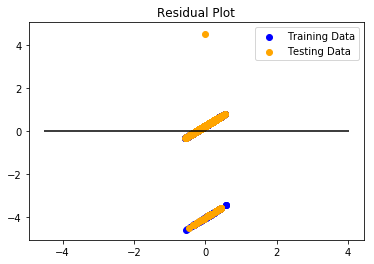

In [130]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

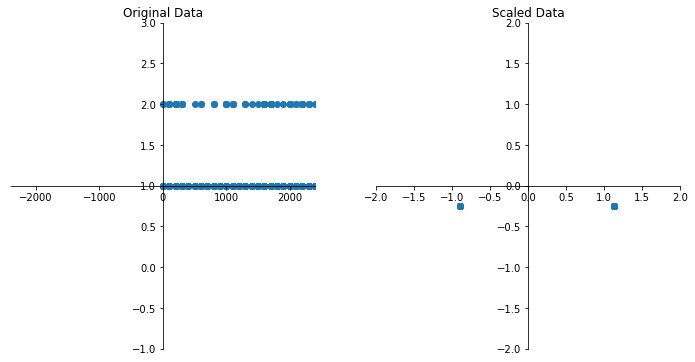

In [131]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Time"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Time"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [136]:
predictions = model.predict(X_test_scaled)

predictions

array([[ 0.23089717],
       [-0.14742488],
       [ 0.14127939],
       ...,
       [-0.12830623],
       [-0.20073021],
       [-0.03832133]])

In [137]:
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9236025420600201, R2: 0.01667609367602818
